In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301, 6.4296,
7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176,
22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836,
6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,11.7,
5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102,
9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994,
20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274,
5.1077, 5.7292, 5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204,
5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])
y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692,
24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164, 3.3928, 10.117,
5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043,
1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233, -1.4211, 2.4756, 4.6042, 3.9624,
5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173,
20.992, 6.6799, 4.0259,1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526,
2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695,
0.152, 2.8214,1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])


In [ ]:
class LinRegAnalytics:
  def __init__(self, fit_intercept = True):
    self.fit_intercept = fit_intercept
  def fit(self, x, y):
    x_train = x
    if self.fit_intercept == True:
      x_train = np.hstack((x, np.ones((x.shape[0],1))))
    self.weights = np.linalg.inv(x_train.T@x_train)@x_train.T@y
    return self
  def predict(self, x):
    if self.fit_intercept == True:
      x_train = np.hstack((x, np.ones((x.shape[0],1))))
    return x_train@self.weights
  def get_weights(self):
    return self.weights

In [ ]:
x_train, x_test, y_train, y_test = \
train_test_split(x[:, np.newaxis], y, test_size=0.2, random_state = 2024-9-16)

In [ ]:
lin_reg_analytics = LinRegAnalytics()
lin_reg_analytics.fit(x_train,y_train)
print(lin_reg_analytics.get_weights())

[ 1.18509683 -3.74775436]


In [ ]:
class LinRegNumerical:
  def __init__(self, fit_intercept = True, n_sample = 10):
    self.fit_intercept = fit_intercept
    self.w = None
    self.n_sample = n_sample
  def fit(self, x, y, lr=0.01, max_iter = 100):
    n, k = x.shape
    if self.w is None:
      self.w = np.random.randn(k + 1 if self.fit_intercept else k)
    if self.fit_intercept == True:
      x_train = np.hstack((x, np.ones((x.shape[0],1))))
    else:
      x_train = x

    self.losses = []
    for iter_num in range(max_iter):
      y_pred = self.predict(x)
      self.losses.append(mean_squared_error(y_pred, y))
      grad = self._calc_gradient(x_train, y, y_pred)
      assert grad.shape == self.w.shape, f'gradient shape {grad.shape} is not equal to weight shape {self.w.shape}'
      self.w -= lr*grad
    return self
  def _calc_gradient(self, x, y, y_pred):
    inds = np.random.choice(np.arange(x.shape[0]), size=self.n_sample, replace = False)
    grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * x[inds]
    grad = grad.mean(axis=0)
    return grad
  def predict(self, x):
    if self.fit_intercept == True:
      x_train = np.hstack((x, np.ones((x.shape[0],1))))
    return x_train@self.w
  def get_weights(self):
    return self.w
  def get_losses(self):
    return self.losses

In [ ]:
lin_reg_numerical = LinRegNumerical(n_sample = 32)
lin_reg_numerical.fit(x_train, y_train)
print(lin_reg_numerical.get_weights())

[ 0.85962923 -0.51606923]


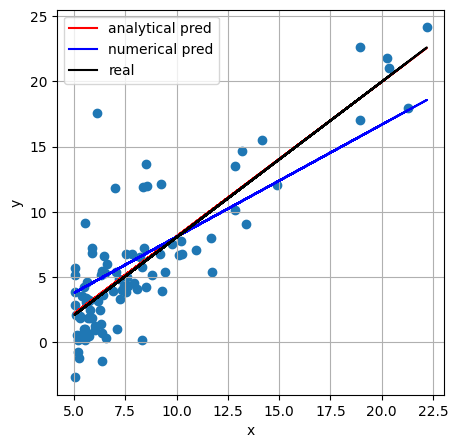

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(x, lin_reg_analytics.predict(x[:, np.newaxis]), label = 'analytical pred', c = 'red')
plt.plot(x, lin_reg_numerical.predict(x[:, np.newaxis]), label = 'numerical pred', c = 'blue')
a, b = np.polyfit(x, y, deg=1)
plt.plot(x, b + a * x, color="k", label = 'real')
plt.xlabel('х')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('Аналитическое решение задачи регрессии')
mape = mean_absolute_percentage_error(y_test, lin_reg_analytics.predict(x_test))
r2 = r2_score(y_test, lin_reg_analytics.predict(x_test))
mse = mean_squared_error(y_test, lin_reg_analytics.predict(x_test))

print(f"Средняя абсолютная процентная ошибка (MAPE): {mape*100}")
print(f"Средняя квадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

Аналитическое решение задачи регрессии
Средняя абсолютная процентная ошибка (MAPE): 112.7272725063
Средняя квадратическая ошибка (MSE): 3.3601796232104477
Коэффициент детерминации (R^2): 0.9257223270968418


In [ ]:
print('Численное решение задачи регрессии')
mape = mean_absolute_percentage_error(y_test, lin_reg_numerical.predict(x_test))
r2 = r2_score(y_test, lin_reg_numerical.predict(x_test))
mse = mean_squared_error(y_test, lin_reg_numerical.predict(x_test))

print(f"Средняя абсолютная процентная ошибка (MAPE): {mape*100}")
print(f"Средняя квадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

Численное решение задачи регрессии
Средняя абсолютная процентная ошибка (MAPE): 173.0611716001898
Средняя квадратическая ошибка (MSE): 7.187628288378706
Коэффициент детерминации (R^2): 0.841115546542244


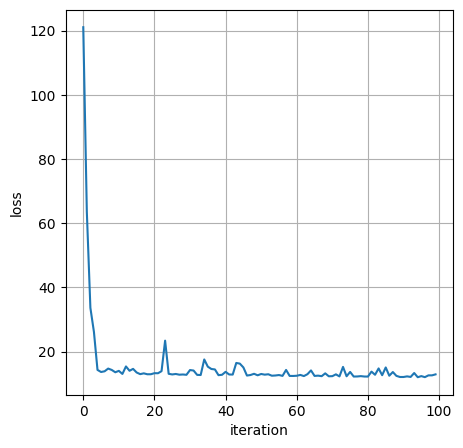

In [ ]:
loss = lin_reg_numerical.get_losses()
plt.figure(figsize=(5,5))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


In [ ]:
data = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

The cost of living indices provided on this website are relative to New York City (NYC), with a baseline index of 100% for NYC.

Here's a breakdown of each index and its meaning:


1.   Cost of Living Index (Excl. Rent): This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. It excludes accommodation expenses such as rent or mortgage. For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).
2.   Rent Index: This index estimates the prices of renting apartments in a city compared to New York City. If the Rent Index is 80, it suggests that the average rental prices in that city are approximately 20% lower than those in New York City.
3. Groceries Index: This index provides an estimation of grocery prices in a city relative to New York City. Numbeo uses item weights from the "Markets" section to calculate this index for each city.
4. Restaurants Index: This index compares the prices of meals and drinks in restaurants and bars to those in NYC.
5. Cost of Living Plus Rent Index: This index estimates consumer goods prices, including rent, in comparison to New York City.
6. Local Purchasing Power: This index indicates the relative purchasing power in a given city based on the average net salary. A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.




In [ ]:
data.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [ ]:
data.dtypes

,0
Rank,int64
Country,object
Cost of Living Index,float64
Rent Index,float64
Cost of Living Plus Rent Index,float64
Groceries Index,float64
Restaurant Price Index,float64
Local Purchasing Power Index,float64


<Axes: >

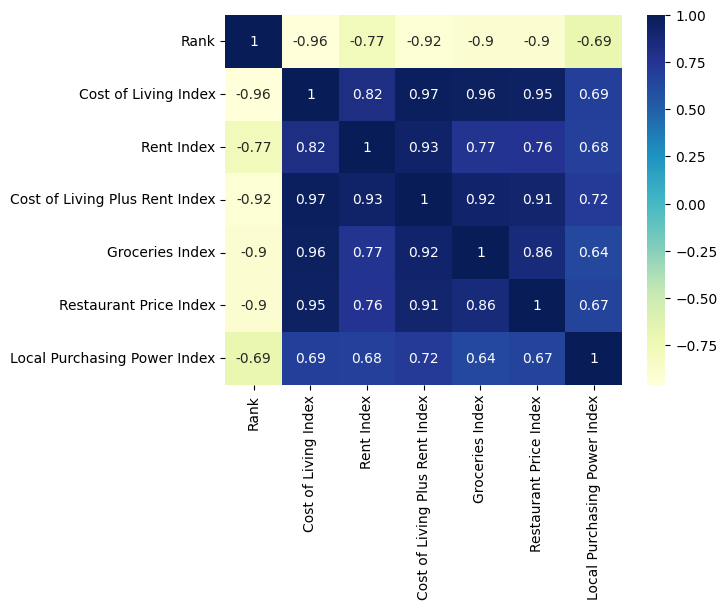

In [ ]:
corr_matrix_pearson = data.select_dtypes(include='number').corr(method = 'pearson').round(2)
sns.heatmap(corr_matrix_pearson, cmap="YlGnBu", annot=True)

<Axes: >

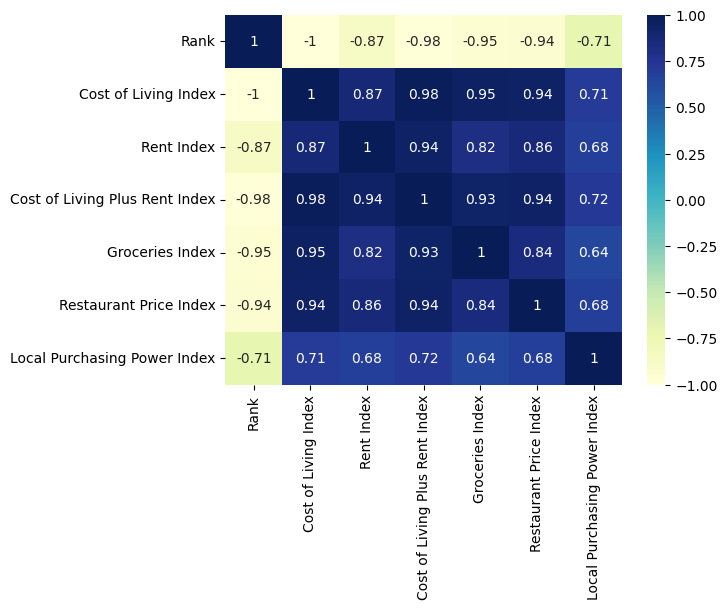

In [ ]:
corr_matrix_spearman = data.select_dtypes(include='number').corr(method = 'spearman').round(2)
sns.heatmap(corr_matrix_spearman, cmap="YlGnBu", annot=True)

In [ ]:
x = data.select_dtypes(include="number").iloc[:, 1:]
y = data.select_dtypes(include="number").iloc[:, 0]
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2024-9-21)

In [ ]:
linregres_without_reg = LinearRegression()
linregres_without_reg.fit(x_train, y_train)
print(np.array(list(zip(x.columns, linregres_without_reg.coef_))).reshape((len(x.columns),2)))

[['Cost of Living Index' '310.1641399910905']
 ['Rent Index' '238.82402727453632']
 ['Cost of Living Plus Rent Index' '-569.753356329594']
 ['Groceries Index' '11.767502466291255']
 ['Restaurant Price Index' '6.168377529364218']
 ['Local Purchasing Power Index' '-3.04296576800861']]


In [ ]:
linregress_Ridge = Ridge(alpha=1.0)
linregress_Ridge.fit(x_train, y_train)
print(np.array(list(zip(x.columns, linregress_Ridge.coef_))).reshape((len(x.columns),2)))

[['Cost of Living Index' '-26.05046353683483']
 ['Rent Index' '7.707986218470509']
 ['Cost of Living Plus Rent Index' '-13.600679460112783']
 ['Groceries Index' '3.3855615203819167']
 ['Restaurant Price Index' '-0.265872260212111']
 ['Local Purchasing Power Index' '-3.2617072357296326']]


In [ ]:
linregress_Lasso = Lasso(alpha=1.0)
linregress_Lasso.fit(x_train, y_train)
print(np.array(list(zip(x.columns, linregress_Lasso.coef_))).reshape((len(x.columns),2)))

[['Cost of Living Index' '-29.900474604526273']
 ['Rent Index' '0.0']
 ['Cost of Living Plus Rent Index' '-0.0']
 ['Groceries Index' '-0.0']
 ['Restaurant Price Index' '-0.0']
 ['Local Purchasing Power Index' '-2.2003989182244874']]


In [ ]:
print('Решение задачи регрессии для структурированных данных без регуляризации')
mape = mean_absolute_percentage_error(y_test, linregres_without_reg.predict(x_test))
r2 = r2_score(y_test, linregres_without_reg.predict(x_test))
mse = mean_squared_error(y_test, linregres_without_reg.predict(x_test))

print(f"Средняя абсолютная процентная ошибка (MAPE): {mape*100}")
print(f"Средняя квадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

Решение задачи регрессии для структурированных данных без регуляризации
Средняя абсолютная процентная ошибка (MAPE): 14.584071033072329
Средняя квадратическая ошибка (MSE): 67.26271001914075
Коэффициент детерминации (R^2): 0.9442159513565935


In [ ]:
print('Решение задачи регрессии для структурированных данных c Ridge-регуляризацией')
mape = mean_absolute_percentage_error(y_test, linregress_Ridge.predict(x_test))
r2 = r2_score(y_test, linregress_Ridge.predict(x_test))
mse = mean_squared_error(y_test, linregress_Ridge.predict(x_test))
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape*100}")
print(f"Средняя квадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

Решение задачи регрессии для структурированных данных c Ridge-регуляризацией
Средняя абсолютная процентная ошибка (MAPE): 16.905486917425037
Средняя квадратическая ошибка (MSE): 87.94455764916256
Коэффициент детерминации (R^2): 0.9270635470912829


In [ ]:
print('Решение задачи регрессии для структурированных данных c Lasso-регуляризацией')
mape = mean_absolute_percentage_error(y_test, linregress_Lasso.predict(x_test))
r2 = r2_score(y_test, linregress_Lasso.predict(x_test))
mse = mean_squared_error(y_test, linregress_Lasso.predict(x_test))

print(f"Средняя абсолютная процентная ошибка (MAPE): {mape*100}")
print(f"Средняя квадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")

Решение задачи регрессии для структурированных данных c Lasso-регуляризацией
Средняя абсолютная процентная ошибка (MAPE): 15.108945390575485
Средняя квадратическая ошибка (MSE): 98.16254455779621
Коэффициент детерминации (R^2): 0.9185893021703349
